# K-Means clustering

In deze opdracht ga je K-Means clustering implementeren. De dataset is bijgeleverd en wordt voor je ingeladen.

In [1]:
# misc data processing imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pickle
import seaborn as sns

# classifier & testing
from sklearn.cluster import KMeans

# for overwriting plots
from IPython import display
import time

## 1. Initialisatie

  * Activeer de onderstaande cel. Deze code hoef je niet aan te passen, maar kun je later aanroepen om het trainen en het resultaat van K-Means te visualiseren.

In [3]:
colors = ['blue', 'red', 'green', 'cyan', 'orange', 'purple', 'black', 'pink']

def plot_KMeans(X, centroids, labels, N=None):
    """Plot an iteration of the K-Means algorithm.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Train data
    
    centroids : 
        array-like, shape = [n_clusters, n_features]
        Cluster means
        
    labels : 
        array-like, shape = [n_samples,] 
        Current cluster assignments for each train data sample
        
    N : int
        Current iteration
    """
    # check input
    if len(centroids) > len(colors):
        raise ValueError("Om te kunnen plotten moet het aantal clusters kleiner zijn dan 8.")
    
    # clear previous plot
    plt.clf()    
    display.clear_output(wait=True)
    time.sleep(0.5)
    
    # plot data points & centroid per label
    for label, color in enumerate(colors[:len(centroids)]):
        plt.scatter(X[labels == label,0], X[labels == label,1], c=color, alpha=0.5)
        plt.scatter(centroids[label,0], centroids[label,1], c=color, marker='*', s=150)
    
    # add title
    if N:
        plt.title("Iteration " + str(N))

    plt.show()

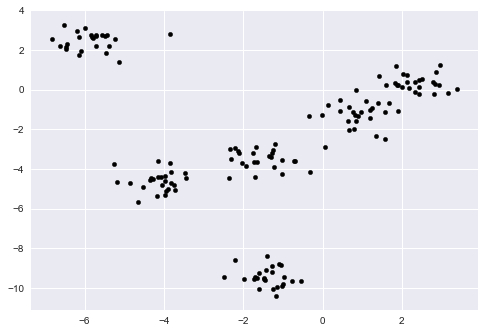

In [2]:
 from sklearn.datasets import make_blobs
 X, y = make_blobs(n_samples=150,
                   n_features=2,
                   centers=6,
                   cluster_std=0.5,
                   shuffle=True,
                   random_state=2)
 plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=20)
 pickle.dump(X, open('blobs1.p', 'wb'))

In [6]:
X

array([[  3.17115255e+00,  -1.82713668e-01],
       [ -1.41463044e+00,  -8.36579197e+00],
       [ -6.43771019e+00,   2.33116092e+00],
       [ -4.31609427e+00,  -4.47405727e+00],
       [ -5.47222822e+00,   1.84187404e+00],
       [ -3.81175830e+00,  -4.17569979e+00],
       [ -1.59744161e+00,  -9.22727724e+00],
       [ -6.13414125e+00,   2.64260469e+00],
       [ -7.79919014e-01,  -9.67202162e+00],
       [ -4.51866402e+00,  -4.88754191e+00],
       [  2.18268410e+00,   7.30173358e-02],
       [ -1.19305396e+00,  -2.76199675e+00],
       [ -4.04802921e+00,  -4.81578779e+00],
       [ -3.75028080e+00,  -4.83087656e+00],
       [  1.40560106e+00,  -6.69445687e-01],
       [ -1.21666153e+00,  -3.89018407e+00],
       [  2.51271000e+00,   5.49376364e-01],
       [  8.02491317e-01,  -1.26030764e+00],
       [  2.02880189e+00,   7.95218722e-01],
       [ -1.09487969e+00,  -8.80165843e+00],
       [  1.82517671e+00,   3.38876613e-01],
       [  4.26682921e-01,  -1.07700587e+00],
       [  

## 2. Data laden

Hieronder wordt een ongelabelde dataset geladen. 

In [4]:
X = pickle.load(open('blobs.p', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'blobs.p'

  * Hoeveel samples zitten er in de dataset? En hoeveel features heeft elk sample?

In [6]:
X.shape

(150, 2)

  * Plot de dataset met behulp van `plt.scatter()`. Hoeveel clusters denk je te zien?  

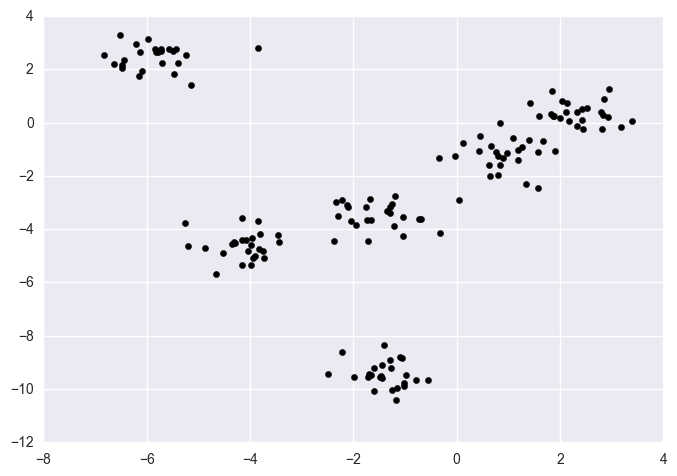

In [8]:
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=20);

## 3. Implementeer K-means

  * Implementeer nu K-Means:
      * gebruik K=6
      * initialiseer de clusters met unieke, willekeurige samples uit de dataset
      * wanneer tijdens het trainen een cluster leeg raakt, stop er dan een willekeurige sample uit de dataset in.
  
  * Gebruik de functie `plot_KMeans()` om het trainen en de uiteindelijke clustering te visualiseren.
  * Wat gebeurt er als je het algoritme meerdere keren draait? Worden altijd dezelfde zes clusters gevonden?

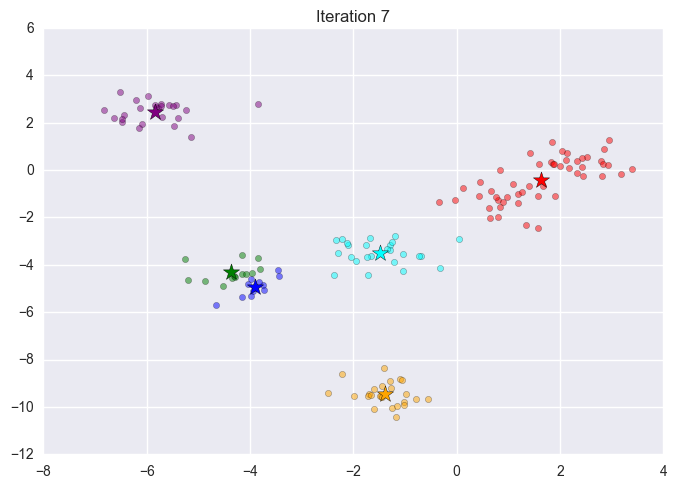

In [11]:
# select number of centroids
K = 6

# select initial centroids
centroids = X[random.sample(range(0, len(X)), K)]

# initialize cluster assignments
labels = np.zeros(len(X))
prev_labels = np.ones(len(X))

# continue while centroids change
N = 0
while not np.array_equal(labels, prev_labels):
    
    # store last labels
    prev_labels = np.array(labels)
    N += 1
        
    # assign each data point to nearest centroid.
    # with enumarate we get an i which is a counter from 0 to length(X) 
    # and point gets the value of X for every loop (point = X{i})
    for i, point in enumerate(X):
        # calculate sum over square over difference between point and every centroid 
        # and take minimum value. Do this for every point.
        labels[i] = np.argmin([sum((point - centroid)**2) for centroid in centroids])

    # update centroids using the new data point assignments
    for i, centroid in enumerate(centroids):
        # check if length of X with label = i is empty or not(>0) 
        if len(X[labels == i]):
            centroids[i] = np.mean(X[labels == i], axis=0)
        else:
            random_point = random.sample(range(0, len(X)), 1)
            labels[random_point] = i
            centroids[i] = X[random_point]
    
    # plot current clustering
    plot_KMeans(X, centroids, labels, N)

## 4. K-Means uit SK-Learn

  * Maak K-Means aan door middel van SK-Learn. Kies de instellingen `n_clusters=6`, en `init='k-means++'`

In [18]:
kmeans = KMeans(n_clusters=6, init='k-means++')

  * Train K-means op de dataset en haal de uiteindelijke labels op door middel van `fit_predict()`.

In [19]:
labels = kmeans.fit_predict(X)
labels

array([4, 3, 2, 0, 2, 0, 3, 2, 3, 0, 4, 5, 0, 0, 1, 5, 4, 1, 4, 3, 4, 1, 1,
       2, 4, 3, 3, 2, 4, 1, 4, 3, 2, 0, 2, 5, 5, 4, 0, 3, 1, 4, 5, 2, 0, 2,
       2, 3, 0, 4, 4, 2, 3, 3, 0, 2, 3, 4, 5, 4, 1, 2, 1, 5, 1, 4, 1, 0, 1,
       5, 1, 0, 1, 5, 1, 0, 4, 2, 5, 2, 2, 5, 1, 4, 2, 5, 0, 0, 4, 5, 3, 3,
       1, 0, 0, 5, 5, 0, 3, 3, 4, 0, 0, 2, 4, 4, 4, 1, 3, 4, 2, 3, 2, 5, 1,
       5, 2, 5, 3, 1, 1, 5, 2, 3, 2, 0, 3, 5, 3, 3, 3, 2, 1, 1, 5, 5, 5, 5,
       0, 1, 1, 2, 4, 0, 1, 5, 4, 0, 3, 0], dtype=int32)

  * Haal de geleerde cluster centers (centroids) op uit K-Means.

In [20]:
centroids = kmeans.cluster_centers_
centroids

array([[-4.1480062 , -4.61049134],
       [ 0.90770781, -1.20262363],
       [-5.84503437,  2.47189054],
       [-1.39507297, -9.4456399 ],
       [ 2.36405331,  0.3610529 ],
       [-1.49191498, -3.48499958]])

  * Plot de data, centroids en labels.
  * Wat gebeurt er als je het algoritme meerdere keren draait? Worden altijd dezelfde zes clusters gevonden?

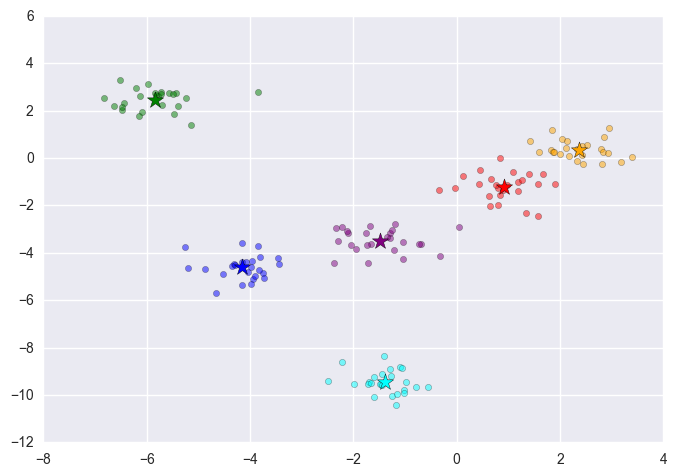

In [21]:
plot_KMeans(X, centroids, labels)

## 5. Elbow-method

* Roep K-Means uit SK-Learn herhaaldelijk aan met `K = 1...15`
* Sla bij elke waarde van `K` de som op van de afstanden tussen elk punten en hun cluster (ook wel *inertia* of *distortion* genoemd)
* Plot de distortions voor elke waarde van `K`. Wat zou een optimale waarde voor `K` zijn?

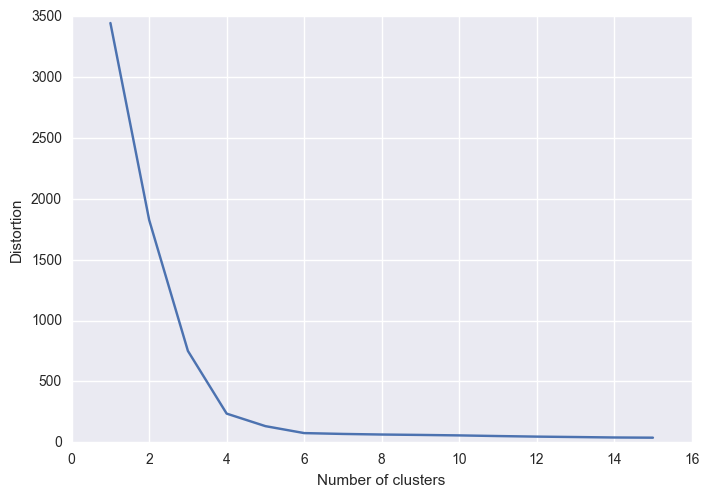

In [23]:
max_K = 15

distortions =  np.zeros(max_K)
for K in range(max_K):
    kmeans = KMeans(n_clusters=K+1)
    kmeans.fit(X)
    
    #distortions[K] = KMeans(n_clusters=K+1).fit(X).inertia_
    distortions[K] = kmeans.inertia_

plt.plot(range(1,max_K+1), distortions)
plt.ylabel('Distortion')
plt.xlabel('Number of clusters');